<a href="https://colab.research.google.com/github/feriel214/API/blob/master/Feriel_Zarrouki_03IDL02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential,Model

from tensorflow.keras.layers import Input, InputLayer,Reshape,Conv2D,MaxPooling2D,Dense, Flatten


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt
from keras.utils import to_categorical


In [ ]:
!pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Taille de:")

print("- Ensemble d'apprentissage:",format(X_train.shape))

print("- Ensemble de test:",format(X_test.shape))

Taille de:
- Ensemble d'apprentissage: (60000, 28, 28)
- Ensemble de test: (10000, 28, 28)


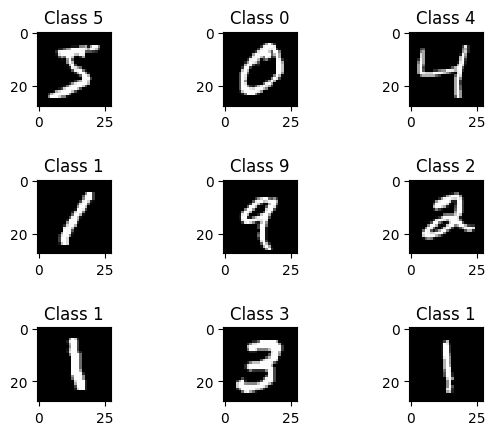

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)

  plt.imshow(X_train[i], cmap='gray',
  interpolation='none')

  plt.subplots_adjust(hspace=1,
  wspace=0.5)

  plt.title("Class {}".format(y_train[i]))

In [ ]:
X_train = X_train.reshape(60000, 784)

X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')

X_test = X_test.astype('float32')

X_train /= 255

X_test /= 255

Y_train = to_categorical(y_train, 10)

Y_test = to_categorical(y_test, 10)
print(y_test[1])
print(Y_test[1])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
img_shape_full = (28, 28, 1)
nb_classes=10
# Commencer la construction du modèle séquentiel de Keras.
model=Sequential()
# Ajouter une couche d'entrée qui doit être un tuple contenant la taille de l'image. model.add(InputLayer (input_shape=(784,)))
# L'entrée est un vecteur de 784 éléments,
# mais les couches convolutionnelles attendent des images avec forme (28, 28, 1)
model.add(Reshape(img_shape_full))
# Première couche convolutionnelle avec activation ReLU et max-pooling.
model.add(Conv2D (kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))
# Deuxième couche convolutionnelle avec activation ReLU et max-pooling.
model.add(Conv2D (kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
#fully-connected / dense layer avec ReLU.
model.add(Dense (128, activation='relu'))
# derniére fully-connected / dense avec softmax-activation pour la classification
model.add(Dense (nb_classes, activation='softmax'))

In [ ]:
inputs = Input (shape=(784,))
# Variable utilisée pour la construction du réseau de neurones.
net=inputs
# L'entrée est un vecteur de 784 éléments,
# mais les couches convolutionnelles attendent des images avec forme (28, 28, 1)
net =Reshape(img_shape_full) (net)
# Première couche convolutionnelle avec activation ReLU et max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same',activation='relu', name='layer_conv1') (net)
net =MaxPooling2D(pool_size=2, strides=2) (net)
# Deuxième couche convolutionnelle avec activation ReLU et max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same',activation= 'relu', name='layer_conv2') (net)
net =MaxPooling2D(pool_size=2, strides=2) (net)
net=Flatten() (net)
#Première couche dense / entièrement connectée avec activation ReLU.
net=Dense (128, activation='relu') (net)
# Deuxiémme couche dense entièrement connectée avec softmax-activation # so it can be used for classification.
net=Dense (nb_classes, activation='softmax') (net)
# Sortie
outputs=net
mode12 = Model (inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
optimizer='adam')

In [ ]:
model.fit(X_train, Y_train,batch_size=128, epochs=10,verbose=1)

Epoch 1/10
469/469 [==============================] - 22s 12ms/step - loss: 0.2112 - accuracy: 0.9371
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0556 - accuracy: 0.9828
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0383 - accuracy: 0.9880
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0189 - accuracy: 0.9941
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0125 - accuracy: 0.9962
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0116 - accuracy: 0.9964
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0083 - accuracy: 0.99

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)

for name, value in zip(model.metrics_names, score):
  print(name, value)

313/313 [==============================] - 1s 4ms/step - loss: 0.0334 - accuracy: 0.9908
loss 0.03340335190296173
accuracy 0.9908000230789185


313/313 [==============================] - 1s 2ms/step


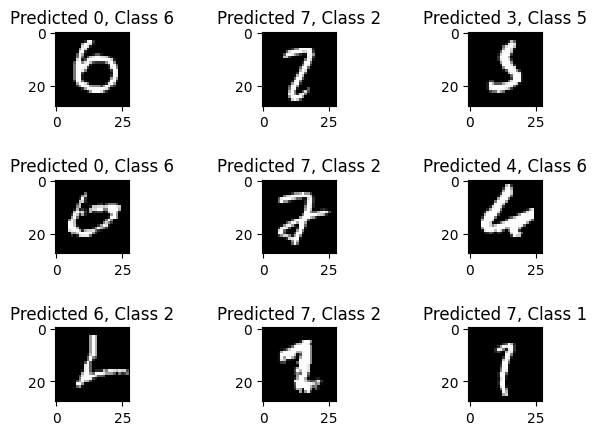

In [ ]:
predict_x=model.predict(X_test)
predicted_classes=np.argmax(predict_x,axis=1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()

for i, incorrect in enumerate(incorrect_indices[:9]):
  plt.subplot(3,3,i+1)

  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray',interpolation='none')
  plt.subplots_adjust(hspace=1, wspace=1.5)
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],
  y_test[incorrect]))

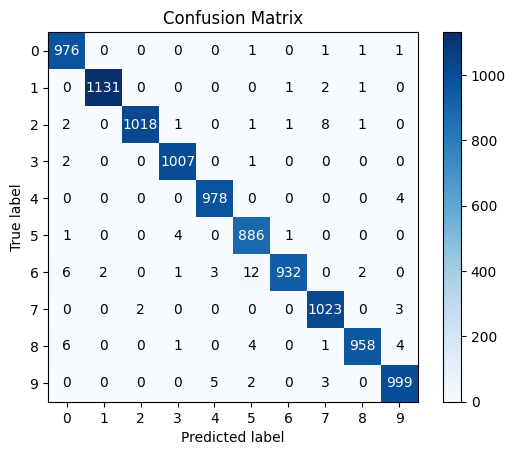

[[ 976    0    0    0    0    1    0    1    1    1]
 [   0 1131    0    0    0    0    1    2    1    0]
 [   2    0 1018    1    0    1    1    8    1    0]
 [   2    0    0 1007    0    1    0    0    0    0]
 [   0    0    0    0  978    0    0    0    0    4]
 [   1    0    0    4    0  886    1    0    0    0]
 [   6    2    0    1    3   12  932    0    2    0]
 [   0    0    2    0    0    0    0 1023    0    3]
 [   6    0    0    1    0    4    0    1  958    4]
 [   0    0    0    0    5    2    0    3    0  999]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      1.00   

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predicted_classes,
normalize=False)

plt.show()
print (confusion_matrix(y_test, predicted_classes))
print (classification_report(y_test, predicted_classes, target_names=None))